In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True,scheduler=None,fileName=None):
    
    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, valid_data, data_monitors, notebook=notebook,scheduler=scheduler)

    # Run the optimiser for 5 epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    
    if fileName != None:
        errorFile = fileName + "_error.pdf"
        accFile = fileName + "_acc.pdf"
        fig_1.tight_layout() # This minimises whitespace around the axes. 
        fig_1.savefig(errorFile)
        fig_2.tight_layout() # This minimises whitespace around the axes. 
        fig_2.savefig(accFile)
    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2

In [2]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider

# Seed a random number generator
seed = 11102018 
rng = np.random.RandomState(seed)
batch_size = 100
# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)
test_data = EMNISTDataProvider('test', batch_size=batch_size, rng=rng)

KeysView(<numpy.lib.npyio.NpzFile object at 0x7fea68313c50>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x7fea8019f3c8>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x7fea68313c50>)


learning_rate 0.009
epoch 1


Epoch 1: 2.8s to complete
    error(train)=2.77e+00, acc(train)=3.23e-01, error(valid)=2.78e+00, acc(valid)=3.14e-01


learning_rate 0.00899932152050288
epoch 2


Epoch 2: 2.6s to complete
    error(train)=1.60e+00, acc(train)=5.58e-01, error(valid)=1.63e+00, acc(valid)=5.48e-01


learning_rate 0.008997286751588873
epoch 3


Epoch 3: 2.6s to complete
    error(train)=1.36e+00, acc(train)=6.18e-01, error(valid)=1.39e+00, acc(valid)=6.02e-01


learning_rate 0.008993897701329235
epoch 4


Epoch 4: 2.7s to complete
    error(train)=1.23e+00, acc(train)=6.50e-01, error(valid)=1.26e+00, acc(valid)=6.36e-01


learning_rate 0.008989157714307406
epoch 5


Epoch 5: 2.7s to complete
    error(train)=1.13e+00, acc(train)=6.76e-01, error(valid)=1.17e+00, acc(valid)=6.63e-01


learning_rate 0.008983071468318313
epoch 6


Epoch 6: 2.7s to complete
    error(train)=1.06e+00, acc(train)=6.95e-01, error(valid)=1.10e+00, acc(valid)=6.80e-01


learning_rate 0.008975644969751947
epoch 7


Epoch 7: 2.7s to complete
    error(train)=9.96e-01, acc(train)=7.11e-01, error(valid)=1.03e+00, acc(valid)=6.98e-01


learning_rate 0.008966885547665778
epoch 8


Epoch 8: 2.7s to complete
    error(train)=9.47e-01, acc(train)=7.23e-01, error(valid)=9.86e-01, acc(valid)=7.11e-01


learning_rate 0.008956801846551867
epoch 9


Epoch 9: 2.7s to complete
    error(train)=9.04e-01, acc(train)=7.35e-01, error(valid)=9.43e-01, acc(valid)=7.22e-01


learning_rate 0.008945403817805796
epoch 10


Epoch 10: 2.7s to complete
    error(train)=8.59e-01, acc(train)=7.45e-01, error(valid)=9.01e-01, acc(valid)=7.29e-01


learning_rate 0.008932702709905836
epoch 11


Epoch 11: 2.7s to complete
    error(train)=8.19e-01, acc(train)=7.56e-01, error(valid)=8.63e-01, acc(valid)=7.41e-01


learning_rate 0.008918711057312059
epoch 12


Epoch 12: 2.7s to complete
    error(train)=7.91e-01, acc(train)=7.63e-01, error(valid)=8.37e-01, acc(valid)=7.48e-01


learning_rate 0.008903442668096345
epoch 13


Epoch 13: 2.7s to complete
    error(train)=7.61e-01, acc(train)=7.71e-01, error(valid)=8.08e-01, acc(valid)=7.56e-01


learning_rate 0.008886912610315474
epoch 14


Epoch 14: 2.7s to complete
    error(train)=7.45e-01, acc(train)=7.73e-01, error(valid)=7.95e-01, acc(valid)=7.57e-01


learning_rate 0.008869137197140777
epoch 15


Epoch 15: 2.7s to complete
    error(train)=7.18e-01, acc(train)=7.82e-01, error(valid)=7.69e-01, acc(valid)=7.67e-01


learning_rate 0.008850133970759004
epoch 16


Epoch 16: 2.7s to complete
    error(train)=7.01e-01, acc(train)=7.84e-01, error(valid)=7.57e-01, acc(valid)=7.66e-01


learning_rate 0.008829921685060312
epoch 17


Epoch 17: 2.7s to complete
    error(train)=6.84e-01, acc(train)=7.91e-01, error(valid)=7.42e-01, acc(valid)=7.71e-01


learning_rate 0.008808520287130422
epoch 18


Epoch 18: 2.7s to complete
    error(train)=6.67e-01, acc(train)=7.95e-01, error(valid)=7.25e-01, acc(valid)=7.76e-01


learning_rate 0.00878595089756527
epoch 19


Epoch 19: 2.7s to complete
    error(train)=6.51e-01, acc(train)=8.00e-01, error(valid)=7.12e-01, acc(valid)=7.82e-01


learning_rate 0.008762235789627522
epoch 20


Epoch 20: 2.7s to complete
    error(train)=6.38e-01, acc(train)=8.01e-01, error(valid)=7.02e-01, acc(valid)=7.82e-01


learning_rate 0.008737398367265552
epoch 21


Epoch 21: 2.7s to complete
    error(train)=6.26e-01, acc(train)=8.04e-01, error(valid)=6.91e-01, acc(valid)=7.82e-01


learning_rate 0.008711463142016575
epoch 22


Epoch 22: 2.7s to complete
    error(train)=6.20e-01, acc(train)=8.06e-01, error(valid)=6.86e-01, acc(valid)=7.86e-01


learning_rate 0.008684455708816709
epoch 23


Epoch 23: 2.7s to complete
    error(train)=6.06e-01, acc(train)=8.11e-01, error(valid)=6.76e-01, acc(valid)=7.92e-01


learning_rate 0.008656402720741882
epoch 24


Epoch 24: 2.7s to complete
    error(train)=5.98e-01, acc(train)=8.12e-01, error(valid)=6.69e-01, acc(valid)=7.90e-01


learning_rate 0.008627331862704441
epoch 25


Epoch 25: 2.7s to complete
    error(train)=5.81e-01, acc(train)=8.17e-01, error(valid)=6.58e-01, acc(valid)=7.94e-01


learning_rate 0.008597271824131503
epoch 26


Epoch 26: 2.7s to complete
    error(train)=5.77e-01, acc(train)=8.19e-01, error(valid)=6.51e-01, acc(valid)=7.96e-01


learning_rate 0.008566252270651947
epoch 27


Epoch 27: 2.8s to complete
    error(train)=5.63e-01, acc(train)=8.22e-01, error(valid)=6.41e-01, acc(valid)=7.99e-01


learning_rate 0.00853430381482002
epoch 28


Epoch 28: 2.7s to complete
    error(train)=5.55e-01, acc(train)=8.23e-01, error(valid)=6.35e-01, acc(valid)=8.00e-01


learning_rate 0.008501457985904449
epoch 29


Epoch 29: 2.7s to complete
    error(train)=5.50e-01, acc(train)=8.24e-01, error(valid)=6.33e-01, acc(valid)=7.99e-01


learning_rate 0.008467747198772843
epoch 30


Epoch 30: 2.8s to complete
    error(train)=5.42e-01, acc(train)=8.27e-01, error(valid)=6.26e-01, acc(valid)=8.02e-01


learning_rate 0.00843320472190215
epoch 31


Epoch 31: 2.8s to complete
    error(train)=5.39e-01, acc(train)=8.27e-01, error(valid)=6.24e-01, acc(valid)=8.01e-01


learning_rate 0.00839786464454668
epoch 32


Epoch 32: 2.8s to complete
    error(train)=5.26e-01, acc(train)=8.32e-01, error(valid)=6.13e-01, acc(valid)=8.05e-01


learning_rate 0.00836176184309612
epoch 33


Epoch 33: 2.8s to complete
    error(train)=5.23e-01, acc(train)=8.32e-01, error(valid)=6.11e-01, acc(valid)=8.06e-01


learning_rate 0.00832493194665676
epoch 34


Epoch 34: 2.8s to complete
    error(train)=5.11e-01, acc(train)=8.35e-01, error(valid)=6.02e-01, acc(valid)=8.07e-01


learning_rate 0.008287411301889858
epoch 35


Epoch 35: 2.8s to complete
    error(train)=5.08e-01, acc(train)=8.37e-01, error(valid)=6.02e-01, acc(valid)=8.10e-01


learning_rate 0.008249236937141876
epoch 36


Epoch 36: 2.8s to complete
    error(train)=5.09e-01, acc(train)=8.36e-01, error(valid)=6.02e-01, acc(valid)=8.06e-01


learning_rate 0.008210446525901974
epoch 37


Epoch 37: 2.8s to complete
    error(train)=4.97e-01, acc(train)=8.40e-01, error(valid)=5.94e-01, acc(valid)=8.09e-01


learning_rate 0.008171078349622822
epoch 38


Epoch 38: 2.8s to complete
    error(train)=5.00e-01, acc(train)=8.38e-01, error(valid)=6.02e-01, acc(valid)=8.08e-01


learning_rate 0.008131171259941432
epoch 39


Epoch 39: 2.8s to complete
    error(train)=4.89e-01, acc(train)=8.40e-01, error(valid)=5.89e-01, acc(valid)=8.11e-01


learning_rate 0.008090764640337277
epoch 40


Epoch 40: 2.8s to complete
    error(train)=4.83e-01, acc(train)=8.43e-01, error(valid)=5.86e-01, acc(valid)=8.11e-01


learning_rate 0.008049898367265553
epoch 41


Epoch 41: 2.8s to complete
    error(train)=4.78e-01, acc(train)=8.44e-01, error(valid)=5.80e-01, acc(valid)=8.14e-01


learning_rate 0.00800861277080394
epoch 42


Epoch 42: 2.8s to complete
    error(train)=4.76e-01, acc(train)=8.45e-01, error(valid)=5.83e-01, acc(valid)=8.12e-01


learning_rate 0.007966948594851676
epoch 43


Epoch 43: 2.8s to complete
    error(train)=4.72e-01, acc(train)=8.46e-01, error(valid)=5.81e-01, acc(valid)=8.16e-01


learning_rate 0.007924946956920247
epoch 44


Epoch 44: 2.8s to complete
    error(train)=4.66e-01, acc(train)=8.48e-01, error(valid)=5.75e-01, acc(valid)=8.16e-01


learning_rate 0.007882649307555372
epoch 45


Epoch 45: 2.7s to complete
    error(train)=4.65e-01, acc(train)=8.47e-01, error(valid)=5.74e-01, acc(valid)=8.15e-01


learning_rate 0.007840097389430317
epoch 46


Epoch 46: 2.8s to complete
    error(train)=4.64e-01, acc(train)=8.49e-01, error(valid)=5.74e-01, acc(valid)=8.14e-01


learning_rate 0.0077973331961509185
epoch 47


Epoch 47: 2.8s to complete
    error(train)=4.57e-01, acc(train)=8.50e-01, error(valid)=5.70e-01, acc(valid)=8.21e-01


learning_rate 0.007754398930812957
epoch 48


Epoch 48: 2.8s to complete
    error(train)=4.52e-01, acc(train)=8.52e-01, error(valid)=5.66e-01, acc(valid)=8.18e-01


learning_rate 0.007711336964352806
epoch 49


Epoch 49: 2.8s to complete
    error(train)=4.52e-01, acc(train)=8.52e-01, error(valid)=5.68e-01, acc(valid)=8.18e-01


learning_rate 0.007668189793732426
epoch 50


Epoch 50: 3.1s to complete
    error(train)=4.47e-01, acc(train)=8.52e-01, error(valid)=5.64e-01, acc(valid)=8.18e-01


learning_rate 0.007625
epoch 51


Epoch 51: 3.1s to complete
    error(train)=4.44e-01, acc(train)=8.54e-01, error(valid)=5.64e-01, acc(valid)=8.20e-01


learning_rate 0.007581810206267574
epoch 52


Epoch 52: 3.1s to complete
    error(train)=4.41e-01, acc(train)=8.54e-01, error(valid)=5.62e-01, acc(valid)=8.19e-01


learning_rate 0.0075386630356471945
epoch 53


Epoch 53: 3.4s to complete
    error(train)=4.39e-01, acc(train)=8.54e-01, error(valid)=5.61e-01, acc(valid)=8.19e-01


learning_rate 0.0074956010691870426
epoch 54


Epoch 54: 2.9s to complete
    error(train)=4.36e-01, acc(train)=8.55e-01, error(valid)=5.63e-01, acc(valid)=8.19e-01


learning_rate 0.007452666803849081
epoch 55


Epoch 55: 2.8s to complete
    error(train)=4.34e-01, acc(train)=8.56e-01, error(valid)=5.61e-01, acc(valid)=8.17e-01


learning_rate 0.007409902610569682
epoch 56


Epoch 56: 2.8s to complete
    error(train)=4.32e-01, acc(train)=8.57e-01, error(valid)=5.58e-01, acc(valid)=8.20e-01


learning_rate 0.0073673506924446285
epoch 57


Epoch 57: 2.8s to complete
    error(train)=4.26e-01, acc(train)=8.58e-01, error(valid)=5.54e-01, acc(valid)=8.23e-01


learning_rate 0.007325053043079755
epoch 58


Epoch 58: 2.8s to complete
    error(train)=4.24e-01, acc(train)=8.60e-01, error(valid)=5.58e-01, acc(valid)=8.19e-01


learning_rate 0.007283051405148325
epoch 59


Epoch 59: 2.8s to complete
    error(train)=4.20e-01, acc(train)=8.60e-01, error(valid)=5.53e-01, acc(valid)=8.21e-01


learning_rate 0.00724138722919606
epoch 60


Epoch 60: 2.8s to complete
    error(train)=4.20e-01, acc(train)=8.59e-01, error(valid)=5.53e-01, acc(valid)=8.20e-01


learning_rate 0.007200101632734448
epoch 61


Epoch 61: 2.8s to complete
    error(train)=4.14e-01, acc(train)=8.62e-01, error(valid)=5.51e-01, acc(valid)=8.21e-01


learning_rate 0.007159235359662725
epoch 62


Epoch 62: 2.8s to complete
    error(train)=4.13e-01, acc(train)=8.63e-01, error(valid)=5.51e-01, acc(valid)=8.22e-01


learning_rate 0.007118828740058568
epoch 63


Epoch 63: 2.8s to complete
    error(train)=4.11e-01, acc(train)=8.63e-01, error(valid)=5.50e-01, acc(valid)=8.22e-01


learning_rate 0.007078921650377177
epoch 64


Epoch 64: 2.9s to complete
    error(train)=4.11e-01, acc(train)=8.63e-01, error(valid)=5.52e-01, acc(valid)=8.21e-01


learning_rate 0.007039553474098025
epoch 65


Epoch 65: 2.7s to complete
    error(train)=4.12e-01, acc(train)=8.61e-01, error(valid)=5.52e-01, acc(valid)=8.22e-01


learning_rate 0.007000763062858123
epoch 66


Epoch 66: 2.8s to complete
    error(train)=4.06e-01, acc(train)=8.63e-01, error(valid)=5.52e-01, acc(valid)=8.23e-01


learning_rate 0.006962588698110141
epoch 67


Epoch 67: 2.8s to complete
    error(train)=4.03e-01, acc(train)=8.64e-01, error(valid)=5.47e-01, acc(valid)=8.21e-01


learning_rate 0.006925068053343239
epoch 68


Epoch 68: 2.8s to complete
    error(train)=4.03e-01, acc(train)=8.64e-01, error(valid)=5.48e-01, acc(valid)=8.24e-01


learning_rate 0.006888238156903879
epoch 69


Epoch 69: 2.8s to complete
    error(train)=4.01e-01, acc(train)=8.65e-01, error(valid)=5.49e-01, acc(valid)=8.21e-01


learning_rate 0.006852135355453321
epoch 70


Epoch 70: 2.8s to complete
    error(train)=3.97e-01, acc(train)=8.67e-01, error(valid)=5.44e-01, acc(valid)=8.24e-01


learning_rate 0.00681679527809785
epoch 71


Epoch 71: 2.7s to complete
    error(train)=4.02e-01, acc(train)=8.65e-01, error(valid)=5.52e-01, acc(valid)=8.24e-01


learning_rate 0.0067822528012271574
epoch 72


Epoch 72: 2.8s to complete
    error(train)=3.90e-01, acc(train)=8.69e-01, error(valid)=5.44e-01, acc(valid)=8.26e-01


learning_rate 0.006748542014095552
epoch 73


Epoch 73: 2.8s to complete
    error(train)=3.94e-01, acc(train)=8.67e-01, error(valid)=5.46e-01, acc(valid)=8.23e-01


learning_rate 0.006715696185179979
epoch 74


Epoch 74: 2.8s to complete
    error(train)=3.87e-01, acc(train)=8.70e-01, error(valid)=5.39e-01, acc(valid)=8.26e-01


learning_rate 0.006683747729348053
epoch 75


Epoch 75: 2.7s to complete
    error(train)=3.90e-01, acc(train)=8.69e-01, error(valid)=5.45e-01, acc(valid)=8.24e-01


learning_rate 0.006652728175868498
epoch 76


Epoch 76: 2.8s to complete
    error(train)=3.86e-01, acc(train)=8.69e-01, error(valid)=5.46e-01, acc(valid)=8.24e-01


learning_rate 0.006622668137295559
epoch 77


Epoch 77: 2.8s to complete
    error(train)=3.85e-01, acc(train)=8.70e-01, error(valid)=5.43e-01, acc(valid)=8.25e-01


learning_rate 0.006593597279258118
epoch 78


Epoch 78: 2.7s to complete
    error(train)=3.84e-01, acc(train)=8.69e-01, error(valid)=5.44e-01, acc(valid)=8.24e-01


learning_rate 0.006565544291183291
epoch 79


Epoch 79: 2.7s to complete
    error(train)=3.85e-01, acc(train)=8.69e-01, error(valid)=5.46e-01, acc(valid)=8.22e-01


learning_rate 0.006538536857983426
epoch 80


Epoch 80: 2.8s to complete
    error(train)=3.79e-01, acc(train)=8.72e-01, error(valid)=5.41e-01, acc(valid)=8.26e-01


learning_rate 0.006512601632734448
epoch 81


Epoch 81: 2.8s to complete
    error(train)=3.81e-01, acc(train)=8.71e-01, error(valid)=5.43e-01, acc(valid)=8.25e-01


learning_rate 0.006487764210372477
epoch 82


Epoch 82: 2.8s to complete
    error(train)=3.77e-01, acc(train)=8.71e-01, error(valid)=5.43e-01, acc(valid)=8.25e-01


learning_rate 0.0064640491024347295
epoch 83


Epoch 83: 2.8s to complete
    error(train)=3.76e-01, acc(train)=8.71e-01, error(valid)=5.42e-01, acc(valid)=8.26e-01


learning_rate 0.0064414797128695776
epoch 84


Epoch 84: 2.7s to complete
    error(train)=3.74e-01, acc(train)=8.73e-01, error(valid)=5.40e-01, acc(valid)=8.27e-01


learning_rate 0.006420078314939688
epoch 85


Epoch 85: 2.8s to complete
    error(train)=3.70e-01, acc(train)=8.75e-01, error(valid)=5.36e-01, acc(valid)=8.27e-01


learning_rate 0.006399866029240995
epoch 86


Epoch 86: 2.8s to complete
    error(train)=3.74e-01, acc(train)=8.73e-01, error(valid)=5.45e-01, acc(valid)=8.27e-01


learning_rate 0.006380862802859224
epoch 87


Epoch 87: 2.7s to complete
    error(train)=3.70e-01, acc(train)=8.72e-01, error(valid)=5.43e-01, acc(valid)=8.23e-01


learning_rate 0.006363087389684526
epoch 88


Epoch 88: 2.8s to complete
    error(train)=3.71e-01, acc(train)=8.72e-01, error(valid)=5.43e-01, acc(valid)=8.26e-01


learning_rate 0.006346557331903655
epoch 89


Epoch 89: 2.8s to complete
    error(train)=3.64e-01, acc(train)=8.76e-01, error(valid)=5.38e-01, acc(valid)=8.26e-01


learning_rate 0.006331288942687941
epoch 90


Epoch 90: 2.8s to complete
    error(train)=3.65e-01, acc(train)=8.74e-01, error(valid)=5.38e-01, acc(valid)=8.24e-01


learning_rate 0.006317297290094164
epoch 91


Epoch 91: 2.8s to complete
    error(train)=3.68e-01, acc(train)=8.75e-01, error(valid)=5.44e-01, acc(valid)=8.27e-01


learning_rate 0.006304596182194203
epoch 92


Epoch 92: 2.8s to complete
    error(train)=3.66e-01, acc(train)=8.76e-01, error(valid)=5.44e-01, acc(valid)=8.26e-01


learning_rate 0.0062931981534481325
epoch 93


Epoch 93: 2.8s to complete
    error(train)=3.66e-01, acc(train)=8.74e-01, error(valid)=5.44e-01, acc(valid)=8.26e-01


learning_rate 0.006283114452334222
epoch 94


Epoch 94: 2.8s to complete
    error(train)=3.59e-01, acc(train)=8.77e-01, error(valid)=5.38e-01, acc(valid)=8.27e-01


learning_rate 0.006274355030248054
epoch 95


Epoch 95: 2.8s to complete
    error(train)=3.59e-01, acc(train)=8.77e-01, error(valid)=5.40e-01, acc(valid)=8.29e-01


learning_rate 0.006266928531681686
epoch 96


Epoch 96: 2.8s to complete
    error(train)=3.57e-01, acc(train)=8.78e-01, error(valid)=5.38e-01, acc(valid)=8.27e-01


learning_rate 0.006260842285692594
epoch 97


Epoch 97: 2.8s to complete
    error(train)=3.57e-01, acc(train)=8.77e-01, error(valid)=5.42e-01, acc(valid)=8.27e-01


learning_rate 0.006256102298670766
epoch 98


Epoch 98: 2.8s to complete
    error(train)=3.56e-01, acc(train)=8.78e-01, error(valid)=5.39e-01, acc(valid)=8.26e-01


learning_rate 0.006252713248411127
epoch 99


Epoch 99: 2.8s to complete
    error(train)=3.53e-01, acc(train)=8.79e-01, error(valid)=5.39e-01, acc(valid)=8.28e-01


learning_rate 0.006250678479497119
epoch 100


Epoch 100: 2.8s to complete
    error(train)=3.51e-01, acc(train)=8.79e-01, error(valid)=5.38e-01, acc(valid)=8.30e-01


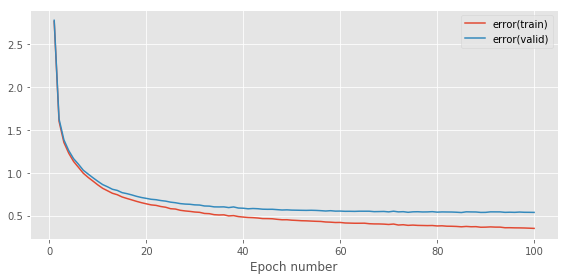

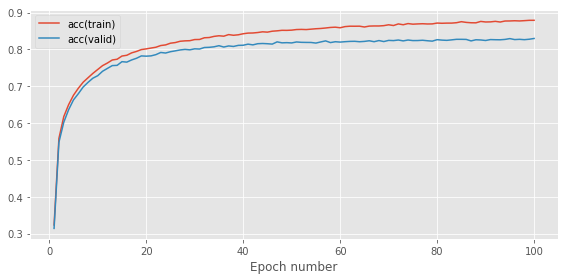

In [3]:
##############SGD With scheduler with no restarts

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule,GradientDescentLearningRule
from mlp.optimisers import Optimiser
from mlp.schedulers import CosineAnnealingWithWarmRestarts

#setup hyperparameters
learning_rate = 0.0075
learning_range = 1.2
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

sgd_scheduler_no_restart = CosineAnnealingWithWarmRestarts(min_learning_rate=learning_rate / learning_range, max_learning_rate=learning_rate * learning_range,
                                                       total_iters_per_period=100,
                                                       max_learning_rate_discount_factor=0.9,
                                                       period_iteration_expansion_factor=1.0)

error = CrossEntropySoftmaxError()

# Use a basic gradient descent learning rule
learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

#Remember to use notebook=False when you write a script to be run in a terminal
_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, test_data, num_epochs, stats_interval, notebook=True,scheduler=sgd_scheduler_no_restart,fileName='cw4_3_SGD_no_restart_{}'.format(learning_rate))

learning_rate 0.009
epoch 1


Epoch 1: 2.8s to complete
    error(train)=2.58e+00, acc(train)=3.70e-01, error(valid)=2.60e+00, acc(valid)=3.65e-01


learning_rate 0.008989157714307406
epoch 2


Epoch 2: 2.7s to complete
    error(train)=1.56e+00, acc(train)=5.64e-01, error(valid)=1.59e+00, acc(valid)=5.51e-01


learning_rate 0.008956801846551867
epoch 3


Epoch 3: 2.7s to complete
    error(train)=1.33e+00, acc(train)=6.24e-01, error(valid)=1.36e+00, acc(valid)=6.10e-01


learning_rate 0.008903442668096345
epoch 4


Epoch 4: 2.7s to complete
    error(train)=1.21e+00, acc(train)=6.54e-01, error(valid)=1.24e+00, acc(valid)=6.40e-01


learning_rate 0.008829921685060312
epoch 5


Epoch 5: 2.7s to complete
    error(train)=1.11e+00, acc(train)=6.81e-01, error(valid)=1.14e+00, acc(valid)=6.64e-01


learning_rate 0.008737398367265552
epoch 6


Epoch 6: 2.7s to complete
    error(train)=1.04e+00, acc(train)=6.97e-01, error(valid)=1.08e+00, acc(valid)=6.81e-01


learning_rate 0.008627331862704441
epoch 7


Epoch 7: 2.7s to complete
    error(train)=9.76e-01, acc(train)=7.16e-01, error(valid)=1.02e+00, acc(valid)=6.98e-01


learning_rate 0.008501457985904449
epoch 8


Epoch 8: 2.8s to complete
    error(train)=9.25e-01, acc(train)=7.28e-01, error(valid)=9.68e-01, acc(valid)=7.12e-01


learning_rate 0.00836176184309612
epoch 9


Epoch 9: 2.8s to complete
    error(train)=8.78e-01, acc(train)=7.41e-01, error(valid)=9.20e-01, acc(valid)=7.26e-01


learning_rate 0.008210446525901974
epoch 10


Epoch 10: 2.8s to complete
    error(train)=8.44e-01, acc(train)=7.50e-01, error(valid)=8.88e-01, acc(valid)=7.31e-01


learning_rate 0.008049898367265553
epoch 11


Epoch 11: 2.8s to complete
    error(train)=8.22e-01, acc(train)=7.54e-01, error(valid)=8.67e-01, acc(valid)=7.34e-01


learning_rate 0.007882649307555372
epoch 12


Epoch 12: 2.8s to complete
    error(train)=7.91e-01, acc(train)=7.64e-01, error(valid)=8.39e-01, acc(valid)=7.43e-01


learning_rate 0.007711336964352806
epoch 13


Epoch 13: 2.8s to complete
    error(train)=7.66e-01, acc(train)=7.70e-01, error(valid)=8.17e-01, acc(valid)=7.51e-01


learning_rate 0.0075386630356471945
epoch 14


Epoch 14: 2.8s to complete
    error(train)=7.49e-01, acc(train)=7.74e-01, error(valid)=8.01e-01, acc(valid)=7.54e-01


learning_rate 0.0073673506924446285
epoch 15


Epoch 15: 2.8s to complete
    error(train)=7.28e-01, acc(train)=7.80e-01, error(valid)=7.80e-01, acc(valid)=7.60e-01


learning_rate 0.007200101632734448
epoch 16


Epoch 16: 2.9s to complete
    error(train)=7.09e-01, acc(train)=7.84e-01, error(valid)=7.63e-01, acc(valid)=7.64e-01


learning_rate 0.007039553474098025
epoch 17


Epoch 17: 2.9s to complete
    error(train)=6.93e-01, acc(train)=7.88e-01, error(valid)=7.50e-01, acc(valid)=7.65e-01


learning_rate 0.006888238156903879
epoch 18


Epoch 18: 2.9s to complete
    error(train)=6.83e-01, acc(train)=7.90e-01, error(valid)=7.42e-01, acc(valid)=7.69e-01


learning_rate 0.006748542014095552
epoch 19


Epoch 19: 2.8s to complete
    error(train)=6.68e-01, acc(train)=7.95e-01, error(valid)=7.27e-01, acc(valid)=7.74e-01


learning_rate 0.006622668137295559
epoch 20


Epoch 20: 2.9s to complete
    error(train)=6.58e-01, acc(train)=7.95e-01, error(valid)=7.18e-01, acc(valid)=7.76e-01


learning_rate 0.006512601632734448
epoch 21


Epoch 21: 2.9s to complete
    error(train)=6.49e-01, acc(train)=7.99e-01, error(valid)=7.13e-01, acc(valid)=7.80e-01


learning_rate 0.006420078314939688
epoch 22


Epoch 22: 2.9s to complete
    error(train)=6.39e-01, acc(train)=8.00e-01, error(valid)=7.04e-01, acc(valid)=7.76e-01


learning_rate 0.006346557331903655
epoch 23


Epoch 23: 3.2s to complete
    error(train)=6.26e-01, acc(train)=8.05e-01, error(valid)=6.91e-01, acc(valid)=7.81e-01


learning_rate 0.0062931981534481325
epoch 24


Epoch 24: 3.3s to complete
    error(train)=6.18e-01, acc(train)=8.06e-01, error(valid)=6.88e-01, acc(valid)=7.85e-01


learning_rate 0.006260842285692594
epoch 25


Epoch 25: 3.6s to complete
    error(train)=6.09e-01, acc(train)=8.10e-01, error(valid)=6.76e-01, acc(valid)=7.89e-01


learning_rate 0.0081
epoch 26


Epoch 26: 3.1s to complete
    error(train)=6.00e-01, acc(train)=8.11e-01, error(valid)=6.70e-01, acc(valid)=7.87e-01


learning_rate 0.008099188617841443
epoch 27


Epoch 27: 2.9s to complete
    error(train)=5.89e-01, acc(train)=8.14e-01, error(valid)=6.60e-01, acc(valid)=7.92e-01


learning_rate 0.00809675589480579
epoch 28


Epoch 28: 2.8s to complete
    error(train)=5.85e-01, acc(train)=8.15e-01, error(valid)=6.58e-01, acc(valid)=7.90e-01


learning_rate 0.008092706098715891
epoch 29


Epoch 29: 2.8s to complete
    error(train)=5.79e-01, acc(train)=8.16e-01, error(valid)=6.57e-01, acc(valid)=7.93e-01


learning_rate 0.008087046334290218
epoch 30


Epoch 30: 2.8s to complete
    error(train)=5.65e-01, acc(train)=8.21e-01, error(valid)=6.42e-01, acc(valid)=7.98e-01


learning_rate 0.00807978653067877
epoch 31


Epoch 31: 2.8s to complete
    error(train)=5.62e-01, acc(train)=8.20e-01, error(valid)=6.44e-01, acc(valid)=7.94e-01


learning_rate 0.008070939424043983
epoch 32


Epoch 32: 2.8s to complete
    error(train)=5.54e-01, acc(train)=8.21e-01, error(valid)=6.36e-01, acc(valid)=7.93e-01


learning_rate 0.008060520535217162
epoch 33


Epoch 33: 2.8s to complete
    error(train)=5.42e-01, acc(train)=8.26e-01, error(valid)=6.24e-01, acc(valid)=7.99e-01


learning_rate 0.008048548142469669
epoch 34


Epoch 34: 2.9s to complete
    error(train)=5.39e-01, acc(train)=8.27e-01, error(valid)=6.23e-01, acc(valid)=8.01e-01


learning_rate 0.008035043249446632
epoch 35


Epoch 35: 2.8s to complete
    error(train)=5.27e-01, acc(train)=8.30e-01, error(valid)=6.13e-01, acc(valid)=8.04e-01


learning_rate 0.008020029548319405
epoch 36


Epoch 36: 2.8s to complete
    error(train)=5.29e-01, acc(train)=8.29e-01, error(valid)=6.16e-01, acc(valid)=8.04e-01


learning_rate 0.008003533378221456
epoch 37


Epoch 37: 2.9s to complete
    error(train)=5.23e-01, acc(train)=8.30e-01, error(valid)=6.13e-01, acc(valid)=8.01e-01


learning_rate 0.007985583679040573
epoch 38


Epoch 38: 2.8s to complete
    error(train)=5.14e-01, acc(train)=8.34e-01, error(valid)=6.05e-01, acc(valid)=8.07e-01


learning_rate 0.007966211940648468
epoch 39


Epoch 39: 2.9s to complete
    error(train)=5.05e-01, acc(train)=8.36e-01, error(valid)=5.99e-01, acc(valid)=8.08e-01


learning_rate 0.007945452147656842
epoch 40


Epoch 40: 2.8s to complete
    error(train)=5.05e-01, acc(train)=8.35e-01, error(valid)=5.99e-01, acc(valid)=8.05e-01


learning_rate 0.007923340719796826
epoch 41


Epoch 41: 2.8s to complete
    error(train)=4.96e-01, acc(train)=8.38e-01, error(valid)=5.92e-01, acc(valid)=8.11e-01


learning_rate 0.0078999164480264
epoch 42


Epoch 42: 2.8s to complete
    error(train)=4.89e-01, acc(train)=8.41e-01, error(valid)=5.86e-01, acc(valid)=8.12e-01


learning_rate 0.007875220426477874
epoch 43


Epoch 43: 2.8s to complete
    error(train)=4.91e-01, acc(train)=8.40e-01, error(valid)=5.90e-01, acc(valid)=8.10e-01


learning_rate 0.007849295980364806
epoch 44


Epoch 44: 2.8s to complete
    error(train)=4.81e-01, acc(train)=8.43e-01, error(valid)=5.83e-01, acc(valid)=8.09e-01


learning_rate 0.007822188589974863
epoch 45


Epoch 45: 2.8s to complete
    error(train)=4.76e-01, acc(train)=8.44e-01, error(valid)=5.78e-01, acc(valid)=8.12e-01


learning_rate 0.007793945810881943
epoch 46


Epoch 46: 2.8s to complete
    error(train)=4.74e-01, acc(train)=8.44e-01, error(valid)=5.79e-01, acc(valid)=8.14e-01


learning_rate 0.007764617190517537
epoch 47


Epoch 47: 2.8s to complete
    error(train)=4.71e-01, acc(train)=8.46e-01, error(valid)=5.76e-01, acc(valid)=8.13e-01


learning_rate 0.007734254181247697
epoch 48


Epoch 48: 2.9s to complete
    error(train)=4.67e-01, acc(train)=8.46e-01, error(valid)=5.75e-01, acc(valid)=8.12e-01


learning_rate 0.007702910050108099
epoch 49


Epoch 49: 2.8s to complete
    error(train)=4.65e-01, acc(train)=8.47e-01, error(valid)=5.71e-01, acc(valid)=8.14e-01


learning_rate 0.007670639785355571
epoch 50


Epoch 50: 2.8s to complete
    error(train)=4.65e-01, acc(train)=8.46e-01, error(valid)=5.75e-01, acc(valid)=8.11e-01


learning_rate 0.0076375
epoch 51


Epoch 51: 2.9s to complete
    error(train)=4.56e-01, acc(train)=8.50e-01, error(valid)=5.72e-01, acc(valid)=8.14e-01


learning_rate 0.007603548832485872
epoch 52


Epoch 52: 2.9s to complete
    error(train)=4.52e-01, acc(train)=8.50e-01, error(valid)=5.67e-01, acc(valid)=8.15e-01


learning_rate 0.007568845844697692
epoch 53


Epoch 53: 2.9s to complete
    error(train)=4.56e-01, acc(train)=8.48e-01, error(valid)=5.72e-01, acc(valid)=8.13e-01


learning_rate 0.007533451917468195
epoch 54


Epoch 54: 2.9s to complete
    error(train)=4.46e-01, acc(train)=8.53e-01, error(valid)=5.61e-01, acc(valid)=8.19e-01


learning_rate 0.007497429143772679
epoch 55


Epoch 55: 2.9s to complete
    error(train)=4.42e-01, acc(train)=8.53e-01, error(valid)=5.60e-01, acc(valid)=8.16e-01


learning_rate 0.007460840719796826
epoch 56


Epoch 56: 2.9s to complete
    error(train)=4.41e-01, acc(train)=8.54e-01, error(valid)=5.60e-01, acc(valid)=8.18e-01


learning_rate 0.007423750834069121
epoch 57


Epoch 57: 2.9s to complete
    error(train)=4.42e-01, acc(train)=8.53e-01, error(valid)=5.61e-01, acc(valid)=8.15e-01


learning_rate 0.007386224554852356
epoch 58


Epoch 58: 3.0s to complete
    error(train)=4.33e-01, acc(train)=8.56e-01, error(valid)=5.55e-01, acc(valid)=8.18e-01


learning_rate 0.007348327715991795
epoch 59


Epoch 59: 3.0s to complete
    error(train)=4.34e-01, acc(train)=8.56e-01, error(valid)=5.58e-01, acc(valid)=8.20e-01


learning_rate 0.007310126801420231
epoch 60


Epoch 60: 2.9s to complete
    error(train)=4.29e-01, acc(train)=8.57e-01, error(valid)=5.54e-01, acc(valid)=8.16e-01


learning_rate 0.00727168882852258
epoch 61


Epoch 61: 3.0s to complete
    error(train)=4.32e-01, acc(train)=8.56e-01, error(valid)=5.57e-01, acc(valid)=8.20e-01


learning_rate 0.007233081230564615
epoch 62


Epoch 62: 3.0s to complete
    error(train)=4.27e-01, acc(train)=8.57e-01, error(valid)=5.54e-01, acc(valid)=8.16e-01


learning_rate 0.007194371738392105
epoch 63


Epoch 63: 2.9s to complete
    error(train)=4.21e-01, acc(train)=8.60e-01, error(valid)=5.49e-01, acc(valid)=8.20e-01


learning_rate 0.007155628261607895
epoch 64


Epoch 64: 2.9s to complete
    error(train)=4.21e-01, acc(train)=8.60e-01, error(valid)=5.50e-01, acc(valid)=8.21e-01


learning_rate 0.007116918769435385
epoch 65


Epoch 65: 3.0s to complete
    error(train)=4.18e-01, acc(train)=8.60e-01, error(valid)=5.52e-01, acc(valid)=8.20e-01


learning_rate 0.007078311171477421
epoch 66


Epoch 66: 2.9s to complete
    error(train)=4.18e-01, acc(train)=8.60e-01, error(valid)=5.52e-01, acc(valid)=8.20e-01


learning_rate 0.007039873198579769
epoch 67


Epoch 67: 3.0s to complete
    error(train)=4.09e-01, acc(train)=8.63e-01, error(valid)=5.41e-01, acc(valid)=8.20e-01


learning_rate 0.0070016722840082046
epoch 68


Epoch 68: 2.9s to complete
    error(train)=4.09e-01, acc(train)=8.62e-01, error(valid)=5.44e-01, acc(valid)=8.22e-01


learning_rate 0.006963775445147644
epoch 69


Epoch 69: 2.9s to complete
    error(train)=4.07e-01, acc(train)=8.64e-01, error(valid)=5.41e-01, acc(valid)=8.24e-01


learning_rate 0.006926249165930879
epoch 70


Epoch 70: 2.9s to complete
    error(train)=4.09e-01, acc(train)=8.63e-01, error(valid)=5.48e-01, acc(valid)=8.22e-01


learning_rate 0.006889159280203174
epoch 71


Epoch 71: 2.9s to complete
    error(train)=4.05e-01, acc(train)=8.64e-01, error(valid)=5.42e-01, acc(valid)=8.23e-01


learning_rate 0.006852570856227321
epoch 72


Epoch 72: 2.9s to complete
    error(train)=4.03e-01, acc(train)=8.65e-01, error(valid)=5.44e-01, acc(valid)=8.22e-01


learning_rate 0.006816548082531805
epoch 73


Epoch 73: 2.9s to complete
    error(train)=3.99e-01, acc(train)=8.66e-01, error(valid)=5.40e-01, acc(valid)=8.22e-01


learning_rate 0.006781154155302308
epoch 74


Epoch 74: 2.9s to complete
    error(train)=4.02e-01, acc(train)=8.64e-01, error(valid)=5.44e-01, acc(valid)=8.24e-01


learning_rate 0.006746451167514128
epoch 75


Epoch 75: 3.1s to complete
    error(train)=3.98e-01, acc(train)=8.66e-01, error(valid)=5.43e-01, acc(valid)=8.23e-01


learning_rate 0.006712500000000001
epoch 76


Epoch 76: 2.9s to complete
    error(train)=3.95e-01, acc(train)=8.67e-01, error(valid)=5.42e-01, acc(valid)=8.23e-01


learning_rate 0.006679360214644428
epoch 77


Epoch 77: 2.9s to complete
    error(train)=3.94e-01, acc(train)=8.67e-01, error(valid)=5.40e-01, acc(valid)=8.24e-01


learning_rate 0.006647089949891901
epoch 78


Epoch 78: 2.9s to complete
    error(train)=3.92e-01, acc(train)=8.67e-01, error(valid)=5.40e-01, acc(valid)=8.25e-01


learning_rate 0.006615745818752303
epoch 79


Epoch 79: 2.9s to complete
    error(train)=3.88e-01, acc(train)=8.69e-01, error(valid)=5.37e-01, acc(valid)=8.23e-01


learning_rate 0.006585382809482462
epoch 80


Epoch 80: 2.9s to complete
    error(train)=3.90e-01, acc(train)=8.67e-01, error(valid)=5.37e-01, acc(valid)=8.22e-01


learning_rate 0.006556054189118057
epoch 81


Epoch 81: 3.0s to complete
    error(train)=3.87e-01, acc(train)=8.70e-01, error(valid)=5.40e-01, acc(valid)=8.23e-01


learning_rate 0.006527811410025137
epoch 82


Epoch 82: 2.9s to complete
    error(train)=3.85e-01, acc(train)=8.70e-01, error(valid)=5.37e-01, acc(valid)=8.24e-01


learning_rate 0.006500704019635195
epoch 83


Epoch 83: 2.9s to complete
    error(train)=3.84e-01, acc(train)=8.70e-01, error(valid)=5.37e-01, acc(valid)=8.26e-01


learning_rate 0.006474779573522126
epoch 84


Epoch 84: 2.9s to complete
    error(train)=3.81e-01, acc(train)=8.71e-01, error(valid)=5.36e-01, acc(valid)=8.24e-01


learning_rate 0.0064500835519735985
epoch 85


Epoch 85: 2.9s to complete
    error(train)=3.86e-01, acc(train)=8.69e-01, error(valid)=5.38e-01, acc(valid)=8.26e-01


learning_rate 0.006426659280203174
epoch 86


Epoch 86: 2.9s to complete
    error(train)=3.80e-01, acc(train)=8.71e-01, error(valid)=5.36e-01, acc(valid)=8.24e-01


learning_rate 0.006404547852343158
epoch 87


Epoch 87: 3.0s to complete
    error(train)=3.83e-01, acc(train)=8.70e-01, error(valid)=5.41e-01, acc(valid)=8.24e-01


learning_rate 0.006383788059351532
epoch 88


Epoch 88: 2.9s to complete
    error(train)=3.77e-01, acc(train)=8.72e-01, error(valid)=5.39e-01, acc(valid)=8.23e-01


learning_rate 0.006364416320959427
epoch 89


Epoch 89: 2.9s to complete
    error(train)=3.81e-01, acc(train)=8.70e-01, error(valid)=5.41e-01, acc(valid)=8.24e-01


learning_rate 0.006346466621778543
epoch 90


Epoch 90: 2.9s to complete
    error(train)=3.72e-01, acc(train)=8.74e-01, error(valid)=5.34e-01, acc(valid)=8.24e-01


learning_rate 0.006329970451680595
epoch 91


Epoch 91: 2.9s to complete
    error(train)=3.70e-01, acc(train)=8.75e-01, error(valid)=5.34e-01, acc(valid)=8.26e-01


learning_rate 0.006314956750553368
epoch 92


Epoch 92: 3.0s to complete
    error(train)=3.69e-01, acc(train)=8.74e-01, error(valid)=5.32e-01, acc(valid)=8.27e-01


learning_rate 0.00630145185753033
epoch 93


Epoch 93: 2.9s to complete
    error(train)=3.70e-01, acc(train)=8.74e-01, error(valid)=5.35e-01, acc(valid)=8.27e-01


learning_rate 0.006289479464782838
epoch 94


Epoch 94: 3.3s to complete
    error(train)=3.67e-01, acc(train)=8.75e-01, error(valid)=5.32e-01, acc(valid)=8.28e-01


learning_rate 0.006279060575956017
epoch 95


Epoch 95: 3.3s to complete
    error(train)=3.66e-01, acc(train)=8.75e-01, error(valid)=5.32e-01, acc(valid)=8.26e-01


learning_rate 0.0062702134693212305
epoch 96


Epoch 96: 3.5s to complete
    error(train)=3.64e-01, acc(train)=8.76e-01, error(valid)=5.31e-01, acc(valid)=8.29e-01


learning_rate 0.006262953665709783
epoch 97


Epoch 97: 3.5s to complete
    error(train)=3.63e-01, acc(train)=8.77e-01, error(valid)=5.31e-01, acc(valid)=8.29e-01


learning_rate 0.006257293901284109
epoch 98


Epoch 98: 2.9s to complete
    error(train)=3.62e-01, acc(train)=8.77e-01, error(valid)=5.33e-01, acc(valid)=8.27e-01


learning_rate 0.006253244105194209
epoch 99


Epoch 99: 2.9s to complete
    error(train)=3.63e-01, acc(train)=8.77e-01, error(valid)=5.36e-01, acc(valid)=8.24e-01


learning_rate 0.006250811382158557
epoch 100


Epoch 100: 2.9s to complete
    error(train)=3.61e-01, acc(train)=8.76e-01, error(valid)=5.34e-01, acc(valid)=8.26e-01


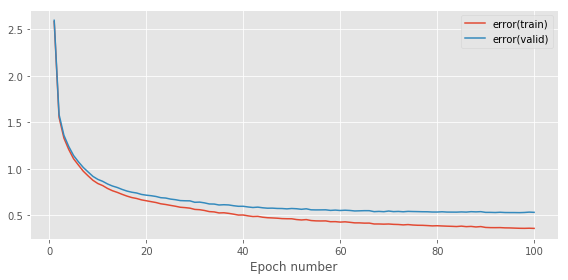

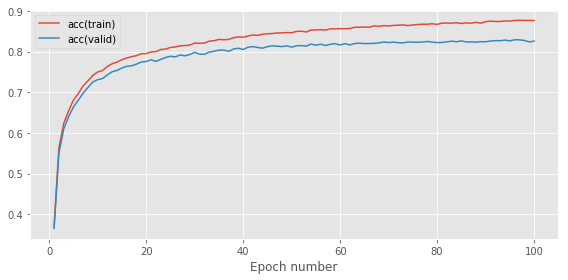

In [4]:
##############SGD With scheduler with special restarts

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule,GradientDescentLearningRule
from mlp.optimisers import Optimiser
from mlp.schedulers import CosineAnnealingWithWarmRestarts

#setup hyperparameters
learning_rate = 0.0075
learning_range = 1.2
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

sgd_scheduler_special = CosineAnnealingWithWarmRestarts(min_learning_rate=learning_rate / learning_range, max_learning_rate=learning_rate * learning_range,
                                                       total_iters_per_period=25,
                                                       max_learning_rate_discount_factor=0.9,
                                                       period_iteration_expansion_factor=3.0)

error = CrossEntropySoftmaxError()

# Use a basic gradient descent learning rule
learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

#Remember to use notebook=False when you write a script to be run in a terminal
_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, test_data, num_epochs, stats_interval, notebook=True,scheduler=sgd_scheduler_special,fileName='cw4_3_SGD_special_restart_{}'.format(learning_rate))

learning_rate 0.000105
epoch 1


Epoch 1: 4.7s to complete
    error(train)=1.39e+00, acc(train)=6.11e-01, error(valid)=1.41e+00, acc(valid)=6.00e-01


learning_rate 0.00010499759154464226
epoch 2


Epoch 2: 4.4s to complete
    error(train)=1.16e+00, acc(train)=6.72e-01, error(valid)=1.19e+00, acc(valid)=6.60e-01


learning_rate 0.00010499036855542371
epoch 3


Epoch 3: 4.5s to complete
    error(train)=1.03e+00, acc(train)=7.04e-01, error(valid)=1.06e+00, acc(valid)=6.92e-01


learning_rate 0.00010497833816056266
epoch 4


Epoch 4: 4.4s to complete
    error(train)=9.44e-01, acc(train)=7.26e-01, error(valid)=9.84e-01, acc(valid)=7.11e-01


learning_rate 0.00010496151223260639
epoch 5


Epoch 5: 4.4s to complete
    error(train)=8.76e-01, acc(train)=7.44e-01, error(valid)=9.19e-01, acc(valid)=7.29e-01


learning_rate 0.00010493990737671437
epoch 6


Epoch 6: 4.5s to complete
    error(train)=8.26e-01, acc(train)=7.55e-01, error(valid)=8.74e-01, acc(valid)=7.39e-01


learning_rate 0.00010491354491427099
epoch 7


Epoch 7: 4.5s to complete
    error(train)=7.90e-01, acc(train)=7.63e-01, error(valid)=8.48e-01, acc(valid)=7.40e-01


learning_rate 0.00010488245086184389
epoch 8


Epoch 8: 4.5s to complete
    error(train)=7.51e-01, acc(train)=7.75e-01, error(valid)=8.08e-01, acc(valid)=7.56e-01


learning_rate 0.0001048466559055088
epoch 9


Epoch 9: 4.5s to complete
    error(train)=7.18e-01, acc(train)=7.84e-01, error(valid)=7.78e-01, acc(valid)=7.62e-01


learning_rate 0.00010480619537056604
epoch 10


Epoch 10: 4.5s to complete
    error(train)=6.94e-01, acc(train)=7.88e-01, error(valid)=7.58e-01, acc(valid)=7.66e-01


learning_rate 0.00010476110918667872
epoch 11


Epoch 11: 4.5s to complete
    error(train)=6.74e-01, acc(train)=7.95e-01, error(valid)=7.41e-01, acc(valid)=7.73e-01


learning_rate 0.00010471144184846706
epoch 12


Epoch 12: 4.4s to complete
    error(train)=6.53e-01, acc(train)=8.00e-01, error(valid)=7.20e-01, acc(valid)=7.76e-01


learning_rate 0.00010465724237159743
epoch 13


Epoch 13: 4.5s to complete
    error(train)=6.35e-01, acc(train)=8.04e-01, error(valid)=7.08e-01, acc(valid)=7.82e-01


learning_rate 0.0001045985642444099
epoch 14


Epoch 14: 4.5s to complete
    error(train)=6.18e-01, acc(train)=8.10e-01, error(valid)=6.94e-01, acc(valid)=7.84e-01


learning_rate 0.00010453546537513177
epoch 15


Epoch 15: 4.5s to complete
    error(train)=6.05e-01, acc(train)=8.12e-01, error(valid)=6.84e-01, acc(valid)=7.87e-01


learning_rate 0.00010446800803472895
epoch 16


Epoch 16: 4.5s to complete
    error(train)=5.89e-01, acc(train)=8.16e-01, error(valid)=6.72e-01, acc(valid)=7.91e-01


learning_rate 0.0001043962587954522
epoch 17


Epoch 17: 4.5s to complete
    error(train)=5.76e-01, acc(train)=8.20e-01, error(valid)=6.59e-01, acc(valid)=7.94e-01


learning_rate 0.0001043202884651383
epoch 18


Epoch 18: 4.5s to complete
    error(train)=5.72e-01, acc(train)=8.21e-01, error(valid)=6.56e-01, acc(valid)=7.95e-01


learning_rate 0.00010424017201733127
epoch 19


Epoch 19: 4.5s to complete
    error(train)=5.57e-01, acc(train)=8.25e-01, error(valid)=6.50e-01, acc(valid)=7.95e-01


learning_rate 0.00010415598851729251
epoch 20


Epoch 20: 4.5s to complete
    error(train)=5.47e-01, acc(train)=8.28e-01, error(valid)=6.41e-01, acc(valid)=7.99e-01


learning_rate 0.00010406782104397297
epoch 21


Epoch 21: 4.6s to complete
    error(train)=5.43e-01, acc(train)=8.29e-01, error(valid)=6.36e-01, acc(valid)=8.00e-01


learning_rate 0.0001039757566080242
epoch 22


Epoch 22: 4.5s to complete
    error(train)=5.31e-01, acc(train)=8.31e-01, error(valid)=6.30e-01, acc(valid)=8.02e-01


learning_rate 0.00010387988606592945
epoch 23


Epoch 23: 4.5s to complete
    error(train)=5.28e-01, acc(train)=8.32e-01, error(valid)=6.28e-01, acc(valid)=8.02e-01


learning_rate 0.00010378030403033915
epoch 24


Epoch 24: 4.6s to complete
    error(train)=5.17e-01, acc(train)=8.34e-01, error(valid)=6.20e-01, acc(valid)=8.03e-01


learning_rate 0.00010367710877669976
epoch 25


Epoch 25: 4.6s to complete
    error(train)=5.05e-01, acc(train)=8.39e-01, error(valid)=6.10e-01, acc(valid)=8.07e-01


learning_rate 0.00010357040214626767
epoch 26


Epoch 26: 4.6s to complete
    error(train)=5.00e-01, acc(train)=8.40e-01, error(valid)=6.07e-01, acc(valid)=8.08e-01


learning_rate 0.00010346028944560431
epoch 27


Epoch 27: 4.6s to complete
    error(train)=4.93e-01, acc(train)=8.41e-01, error(valid)=6.03e-01, acc(valid)=8.09e-01


learning_rate 0.00010334687934265117
epoch 28


Epoch 28: 4.6s to complete
    error(train)=4.91e-01, acc(train)=8.42e-01, error(valid)=6.04e-01, acc(valid)=8.09e-01


learning_rate 0.00010323028375948765
epoch 29


Epoch 29: 4.6s to complete
    error(train)=4.80e-01, acc(train)=8.46e-01, error(valid)=5.94e-01, acc(valid)=8.12e-01


learning_rate 0.00010311061776187763
epoch 30


Epoch 30: 4.6s to complete
    error(train)=4.76e-01, acc(train)=8.46e-01, error(valid)=5.95e-01, acc(valid)=8.10e-01


learning_rate 0.00010298799944571326
epoch 31


Epoch 31: 4.6s to complete
    error(train)=4.70e-01, acc(train)=8.48e-01, error(valid)=5.89e-01, acc(valid)=8.12e-01


learning_rate 0.00010286254982046874
epoch 32


Epoch 32: 4.8s to complete
    error(train)=4.73e-01, acc(train)=8.46e-01, error(valid)=5.94e-01, acc(valid)=8.11e-01


learning_rate 0.00010273439268977844
epoch 33


Epoch 33: 5.0s to complete
    error(train)=4.62e-01, acc(train)=8.51e-01, error(valid)=5.86e-01, acc(valid)=8.13e-01


learning_rate 0.00010260365452925777
epoch 34


Epoch 34: 5.0s to complete
    error(train)=4.56e-01, acc(train)=8.53e-01, error(valid)=5.81e-01, acc(valid)=8.17e-01


learning_rate 0.00010247046436168695
epoch 35


Epoch 35: 5.0s to complete
    error(train)=4.49e-01, acc(train)=8.54e-01, error(valid)=5.79e-01, acc(valid)=8.16e-01


learning_rate 0.00010233495362968112
epoch 36


Epoch 36: 5.0s to complete
    error(train)=4.45e-01, acc(train)=8.56e-01, error(valid)=5.77e-01, acc(valid)=8.17e-01


learning_rate 0.00010219725606597238
epoch 37


Epoch 37: 5.1s to complete
    error(train)=4.48e-01, acc(train)=8.51e-01, error(valid)=5.80e-01, acc(valid)=8.14e-01


learning_rate 0.00010205750756143167
epoch 38


Epoch 38: 4.9s to complete
    error(train)=4.41e-01, acc(train)=8.56e-01, error(valid)=5.77e-01, acc(valid)=8.13e-01


learning_rate 0.00010191584603096093
epoch 39


Epoch 39: 4.5s to complete
    error(train)=4.36e-01, acc(train)=8.57e-01, error(valid)=5.71e-01, acc(valid)=8.17e-01


learning_rate 0.00010177241127738773
epoch 40


Epoch 40: 4.5s to complete
    error(train)=4.35e-01, acc(train)=8.58e-01, error(valid)=5.73e-01, acc(valid)=8.19e-01


learning_rate 0.00010162734485349677
epoch 41


Epoch 41: 4.6s to complete
    error(train)=4.31e-01, acc(train)=8.57e-01, error(valid)=5.73e-01, acc(valid)=8.18e-01


learning_rate 0.00010148078992233434
epoch 42


Epoch 42: 4.5s to complete
    error(train)=4.24e-01, acc(train)=8.61e-01, error(valid)=5.66e-01, acc(valid)=8.17e-01


learning_rate 0.0001013328911159237
epoch 43


Epoch 43: 4.6s to complete
    error(train)=4.21e-01, acc(train)=8.61e-01, error(valid)=5.71e-01, acc(valid)=8.18e-01


learning_rate 0.00010118379439253074
epoch 44


Epoch 44: 4.5s to complete
    error(train)=4.23e-01, acc(train)=8.58e-01, error(valid)=5.72e-01, acc(valid)=8.15e-01


learning_rate 0.0001010336468926208
epoch 45


Epoch 45: 4.5s to complete
    error(train)=4.16e-01, acc(train)=8.62e-01, error(valid)=5.67e-01, acc(valid)=8.21e-01


learning_rate 0.00010088259679364875
epoch 46


Epoch 46: 4.8s to complete
    error(train)=4.09e-01, acc(train)=8.65e-01, error(valid)=5.62e-01, acc(valid)=8.21e-01


learning_rate 0.00010073079316382578
epoch 47


Epoch 47: 5.0s to complete
    error(train)=4.10e-01, acc(train)=8.64e-01, error(valid)=5.65e-01, acc(valid)=8.18e-01


learning_rate 0.00010057838581500704
epoch 48


Epoch 48: 6.5s to complete
    error(train)=4.08e-01, acc(train)=8.63e-01, error(valid)=5.67e-01, acc(valid)=8.20e-01


learning_rate 0.00010042552515484546
epoch 49


Epoch 49: 4.5s to complete
    error(train)=4.02e-01, acc(train)=8.66e-01, error(valid)=5.62e-01, acc(valid)=8.20e-01


learning_rate 0.00010027236203835754
epoch 50


Epoch 50: 4.5s to complete
    error(train)=3.98e-01, acc(train)=8.67e-01, error(valid)=5.58e-01, acc(valid)=8.21e-01


learning_rate 0.00010011904761904762
epoch 51


Epoch 51: 4.5s to complete
    error(train)=3.95e-01, acc(train)=8.69e-01, error(valid)=5.58e-01, acc(valid)=8.24e-01


learning_rate 9.996573319973771e-05
epoch 52


Epoch 52: 4.6s to complete
    error(train)=3.91e-01, acc(train)=8.70e-01, error(valid)=5.56e-01, acc(valid)=8.23e-01


learning_rate 9.981257008324978e-05
epoch 53


Epoch 53: 4.6s to complete
    error(train)=3.90e-01, acc(train)=8.69e-01, error(valid)=5.58e-01, acc(valid)=8.20e-01


learning_rate 9.96597094230882e-05
epoch 54


Epoch 54: 4.6s to complete
    error(train)=3.85e-01, acc(train)=8.72e-01, error(valid)=5.56e-01, acc(valid)=8.25e-01


learning_rate 9.950730207426947e-05
epoch 55


Epoch 55: 4.6s to complete
    error(train)=3.84e-01, acc(train)=8.71e-01, error(valid)=5.55e-01, acc(valid)=8.22e-01


learning_rate 9.93554984444465e-05
epoch 56


Epoch 56: 4.7s to complete
    error(train)=3.81e-01, acc(train)=8.72e-01, error(valid)=5.53e-01, acc(valid)=8.22e-01


learning_rate 9.920444834547444e-05
epoch 57


Epoch 57: 4.7s to complete
    error(train)=3.79e-01, acc(train)=8.73e-01, error(valid)=5.56e-01, acc(valid)=8.22e-01


learning_rate 9.90543008455645e-05
epoch 58


Epoch 58: 4.6s to complete
    error(train)=3.75e-01, acc(train)=8.75e-01, error(valid)=5.54e-01, acc(valid)=8.23e-01


learning_rate 9.890520412217155e-05
epoch 59


Epoch 59: 4.7s to complete
    error(train)=3.73e-01, acc(train)=8.75e-01, error(valid)=5.52e-01, acc(valid)=8.25e-01


learning_rate 9.87573053157609e-05
epoch 60


Epoch 60: 4.7s to complete
    error(train)=3.74e-01, acc(train)=8.74e-01, error(valid)=5.57e-01, acc(valid)=8.25e-01


learning_rate 9.861075038459847e-05
epoch 61


Epoch 61: 4.6s to complete
    error(train)=3.69e-01, acc(train)=8.76e-01, error(valid)=5.53e-01, acc(valid)=8.24e-01


learning_rate 9.846568396070751e-05
epoch 62


Epoch 62: 4.7s to complete
    error(train)=3.69e-01, acc(train)=8.77e-01, error(valid)=5.54e-01, acc(valid)=8.24e-01


learning_rate 9.832224920713431e-05
epoch 63


Epoch 63: 4.6s to complete
    error(train)=3.66e-01, acc(train)=8.77e-01, error(valid)=5.50e-01, acc(valid)=8.24e-01


learning_rate 9.818058767666357e-05
epoch 64


Epoch 64: 4.6s to complete
    error(train)=3.63e-01, acc(train)=8.78e-01, error(valid)=5.51e-01, acc(valid)=8.22e-01


learning_rate 9.804083917212287e-05
epoch 65


Epoch 65: 4.6s to complete
    error(train)=3.66e-01, acc(train)=8.75e-01, error(valid)=5.58e-01, acc(valid)=8.20e-01


learning_rate 9.790314160841412e-05
epoch 66


Epoch 66: 4.7s to complete
    error(train)=3.62e-01, acc(train)=8.77e-01, error(valid)=5.52e-01, acc(valid)=8.24e-01


learning_rate 9.77676308764083e-05
epoch 67


Epoch 67: 4.6s to complete
    error(train)=3.58e-01, acc(train)=8.79e-01, error(valid)=5.54e-01, acc(valid)=8.25e-01


learning_rate 9.763444070883747e-05
epoch 68


Epoch 68: 4.6s to complete
    error(train)=3.56e-01, acc(train)=8.78e-01, error(valid)=5.55e-01, acc(valid)=8.23e-01


learning_rate 9.750370254831681e-05
epoch 69


Epoch 69: 4.5s to complete
    error(train)=3.52e-01, acc(train)=8.81e-01, error(valid)=5.52e-01, acc(valid)=8.25e-01


learning_rate 9.73755454176265e-05
epoch 70


Epoch 70: 4.6s to complete
    error(train)=3.50e-01, acc(train)=8.81e-01, error(valid)=5.52e-01, acc(valid)=8.25e-01


learning_rate 9.725009579238198e-05
epoch 71


Epoch 71: 4.6s to complete
    error(train)=3.49e-01, acc(train)=8.81e-01, error(valid)=5.51e-01, acc(valid)=8.25e-01


learning_rate 9.712747747621762e-05
epoch 72


Epoch 72: 4.7s to complete
    error(train)=3.45e-01, acc(train)=8.83e-01, error(valid)=5.50e-01, acc(valid)=8.27e-01


learning_rate 9.700781147860759e-05
epoch 73


Epoch 73: 4.6s to complete
    error(train)=3.45e-01, acc(train)=8.83e-01, error(valid)=5.54e-01, acc(valid)=8.27e-01


learning_rate 9.689121589544408e-05
epoch 74


Epoch 74: 4.6s to complete
    error(train)=3.46e-01, acc(train)=8.82e-01, error(valid)=5.55e-01, acc(valid)=8.26e-01


learning_rate 9.677780579249093e-05
epoch 75


Epoch 75: 4.6s to complete
    error(train)=3.41e-01, acc(train)=8.84e-01, error(valid)=5.52e-01, acc(valid)=8.24e-01


learning_rate 9.666769309182757e-05
epoch 76


Epoch 76: 4.6s to complete
    error(train)=3.40e-01, acc(train)=8.84e-01, error(valid)=5.54e-01, acc(valid)=8.25e-01


learning_rate 9.656098646139549e-05
epoch 77


Epoch 77: 4.6s to complete
    error(train)=3.37e-01, acc(train)=8.85e-01, error(valid)=5.54e-01, acc(valid)=8.26e-01


learning_rate 9.645779120775609e-05
epoch 78


Epoch 78: 4.5s to complete
    error(train)=3.36e-01, acc(train)=8.85e-01, error(valid)=5.57e-01, acc(valid)=8.26e-01


learning_rate 9.63582091721658e-05
epoch 79


Epoch 79: 4.6s to complete
    error(train)=3.34e-01, acc(train)=8.86e-01, error(valid)=5.55e-01, acc(valid)=8.27e-01


learning_rate 9.626233863007104e-05
epoch 80


Epoch 80: 4.7s to complete
    error(train)=3.34e-01, acc(train)=8.86e-01, error(valid)=5.56e-01, acc(valid)=8.26e-01


learning_rate 9.617027419412228e-05
epoch 81


Epoch 81: 4.6s to complete
    error(train)=3.28e-01, acc(train)=8.89e-01, error(valid)=5.52e-01, acc(valid)=8.27e-01


learning_rate 9.608210672080273e-05
epoch 82


Epoch 82: 4.6s to complete
    error(train)=3.33e-01, acc(train)=8.86e-01, error(valid)=5.57e-01, acc(valid)=8.24e-01


learning_rate 9.599792322076398e-05
epoch 83


Epoch 83: 4.6s to complete
    error(train)=3.25e-01, acc(train)=8.90e-01, error(valid)=5.52e-01, acc(valid)=8.25e-01


learning_rate 9.591780677295695e-05
epoch 84


Epoch 84: 4.6s to complete
    error(train)=3.26e-01, acc(train)=8.89e-01, error(valid)=5.57e-01, acc(valid)=8.26e-01


learning_rate 9.584183644264305e-05
epoch 85


Epoch 85: 4.5s to complete
    error(train)=3.26e-01, acc(train)=8.89e-01, error(valid)=5.56e-01, acc(valid)=8.23e-01


learning_rate 9.57700872033663e-05
epoch 86


Epoch 86: 4.6s to complete
    error(train)=3.22e-01, acc(train)=8.90e-01, error(valid)=5.58e-01, acc(valid)=8.26e-01


learning_rate 9.570262986296348e-05
epoch 87


Epoch 87: 4.5s to complete
    error(train)=3.20e-01, acc(train)=8.90e-01, error(valid)=5.56e-01, acc(valid)=8.25e-01


learning_rate 9.563953099368534e-05
epoch 88


Epoch 88: 4.5s to complete
    error(train)=3.19e-01, acc(train)=8.90e-01, error(valid)=5.57e-01, acc(valid)=8.27e-01


learning_rate 9.558085286649782e-05
epoch 89


Epoch 89: 4.5s to complete
    error(train)=3.17e-01, acc(train)=8.92e-01, error(valid)=5.56e-01, acc(valid)=8.28e-01


learning_rate 9.552665338962819e-05
epoch 90


Epoch 90: 4.5s to complete
    error(train)=3.15e-01, acc(train)=8.92e-01, error(valid)=5.58e-01, acc(valid)=8.25e-01


learning_rate 9.547698605141651e-05
epoch 91


Epoch 91: 4.6s to complete
    error(train)=3.16e-01, acc(train)=8.91e-01, error(valid)=5.58e-01, acc(valid)=8.27e-01


learning_rate 9.543189986752921e-05
epoch 92


Epoch 92: 4.6s to complete
    error(train)=3.14e-01, acc(train)=8.92e-01, error(valid)=5.59e-01, acc(valid)=8.25e-01


learning_rate 9.539143933258645e-05
epoch 93


Epoch 93: 4.5s to complete
    error(train)=3.12e-01, acc(train)=8.93e-01, error(valid)=5.64e-01, acc(valid)=8.26e-01


learning_rate 9.535564437625136e-05
epoch 94


Epoch 94: 4.5s to complete
    error(train)=3.13e-01, acc(train)=8.91e-01, error(valid)=5.67e-01, acc(valid)=8.23e-01


learning_rate 9.532455032382426e-05
epoch 95


Epoch 95: 4.6s to complete
    error(train)=3.07e-01, acc(train)=8.95e-01, error(valid)=5.57e-01, acc(valid)=8.26e-01


learning_rate 9.529818786138088e-05
epoch 96


Epoch 96: 4.5s to complete
    error(train)=3.09e-01, acc(train)=8.93e-01, error(valid)=5.68e-01, acc(valid)=8.23e-01


learning_rate 9.527658300548886e-05
epoch 97


Epoch 97: 5.1s to complete
    error(train)=3.07e-01, acc(train)=8.94e-01, error(valid)=5.65e-01, acc(valid)=8.24e-01


learning_rate 9.525975707753259e-05
epoch 98


Epoch 98: 5.3s to complete
    error(train)=3.07e-01, acc(train)=8.94e-01, error(valid)=5.67e-01, acc(valid)=8.25e-01


learning_rate 9.524772668267153e-05
epoch 99


Epoch 99: 5.5s to complete
    error(train)=3.07e-01, acc(train)=8.94e-01, error(valid)=5.66e-01, acc(valid)=8.23e-01


learning_rate 9.524050369345298e-05
epoch 100


Epoch 100: 4.6s to complete
    error(train)=3.02e-01, acc(train)=8.96e-01, error(valid)=5.66e-01, acc(valid)=8.27e-01


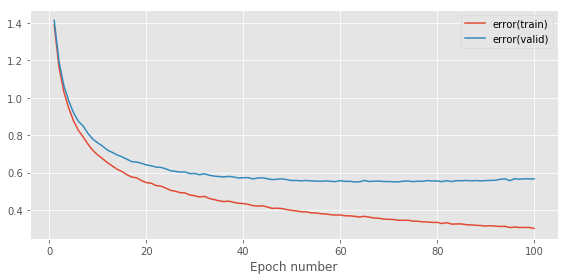

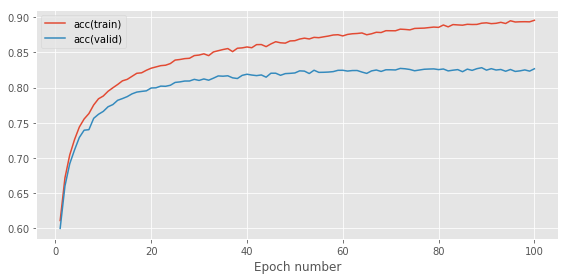

In [5]:
############# Adam BaseLine with no restart scheduler

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule,GradientDescentLearningRule,RMSPropLearningRule
from mlp.optimisers import Optimiser
from mlp.schedulers import CosineAnnealingWithWarmRestarts

#setup hyperparameters
learning_rate = 1e-4
learning_ranges = [1.05]
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100

for learning_range in learning_ranges:
    

    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)
    model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
        ReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])

    adam_scheduler_no_restart = CosineAnnealingWithWarmRestarts(min_learning_rate=learning_rate / learning_range, max_learning_rate=learning_rate * learning_range,
                                                       total_iters_per_period=100,
                                                       max_learning_rate_discount_factor=0.9,
                                                       period_iteration_expansion_factor=1.0)

    error = CrossEntropySoftmaxError() 

    # Use a basic gradient descent learning rule
    learning_rule = AdamLearningRule(learning_rate=learning_rate)

    #Remember to use notebook=False when you write a script to be run in a terminal
    _ = train_model_and_plot_stats(
        model, error, learning_rule, train_data, test_data, num_epochs, stats_interval, notebook=True,scheduler=adam_scheduler_no_restart,fileName='cw4_3_adam_no_restart_{}'.format(learning_rate))

learning_rate 0.000105
epoch 1


Epoch 1: 4.5s to complete
    error(train)=1.43e+00, acc(train)=6.04e-01, error(valid)=1.46e+00, acc(valid)=5.96e-01


learning_rate 0.00010496151223260639
epoch 2


Epoch 2: 4.4s to complete
    error(train)=1.17e+00, acc(train)=6.67e-01, error(valid)=1.20e+00, acc(valid)=6.54e-01


learning_rate 0.0001048466559055088
epoch 3


Epoch 3: 4.4s to complete
    error(train)=1.04e+00, acc(train)=7.03e-01, error(valid)=1.07e+00, acc(valid)=6.93e-01


learning_rate 0.00010465724237159743
epoch 4


Epoch 4: 4.4s to complete
    error(train)=9.45e-01, acc(train)=7.24e-01, error(valid)=9.86e-01, acc(valid)=7.10e-01


learning_rate 0.0001043962587954522
epoch 5


Epoch 5: 4.4s to complete
    error(train)=8.75e-01, acc(train)=7.42e-01, error(valid)=9.21e-01, acc(valid)=7.23e-01


learning_rate 0.00010406782104397297
epoch 6


Epoch 6: 4.4s to complete
    error(train)=8.16e-01, acc(train)=7.58e-01, error(valid)=8.64e-01, acc(valid)=7.39e-01


learning_rate 0.00010367710877669976
epoch 7


Epoch 7: 4.5s to complete
    error(train)=7.77e-01, acc(train)=7.68e-01, error(valid)=8.27e-01, acc(valid)=7.48e-01


learning_rate 0.00010323028375948765
epoch 8


Epoch 8: 4.6s to complete
    error(train)=7.39e-01, acc(train)=7.74e-01, error(valid)=7.95e-01, acc(valid)=7.53e-01


learning_rate 0.00010273439268977844
epoch 9


Epoch 9: 4.6s to complete
    error(train)=7.08e-01, acc(train)=7.85e-01, error(valid)=7.64e-01, acc(valid)=7.61e-01


learning_rate 0.00010219725606597238
epoch 10


Epoch 10: 4.6s to complete
    error(train)=6.85e-01, acc(train)=7.88e-01, error(valid)=7.46e-01, acc(valid)=7.66e-01


learning_rate 0.00010162734485349677
epoch 11


Epoch 11: 4.6s to complete
    error(train)=6.59e-01, acc(train)=7.95e-01, error(valid)=7.24e-01, acc(valid)=7.73e-01


learning_rate 0.0001010336468926208
epoch 12


Epoch 12: 4.6s to complete
    error(train)=6.45e-01, acc(train)=8.00e-01, error(valid)=7.16e-01, acc(valid)=7.74e-01


learning_rate 0.00010042552515484546
epoch 13


Epoch 13: 4.6s to complete
    error(train)=6.21e-01, acc(train)=8.07e-01, error(valid)=6.91e-01, acc(valid)=7.84e-01


learning_rate 9.981257008324978e-05
epoch 14


Epoch 14: 4.6s to complete
    error(train)=6.05e-01, acc(train)=8.11e-01, error(valid)=6.78e-01, acc(valid)=7.89e-01


learning_rate 9.920444834547444e-05
epoch 15


Epoch 15: 4.6s to complete
    error(train)=5.95e-01, acc(train)=8.13e-01, error(valid)=6.70e-01, acc(valid)=7.90e-01


learning_rate 9.861075038459847e-05
epoch 16


Epoch 16: 4.7s to complete
    error(train)=5.80e-01, acc(train)=8.17e-01, error(valid)=6.60e-01, acc(valid)=7.92e-01


learning_rate 9.804083917212287e-05
epoch 17


Epoch 17: 4.6s to complete
    error(train)=5.70e-01, acc(train)=8.20e-01, error(valid)=6.53e-01, acc(valid)=7.94e-01


learning_rate 9.750370254831681e-05
epoch 18


Epoch 18: 4.7s to complete
    error(train)=5.60e-01, acc(train)=8.22e-01, error(valid)=6.42e-01, acc(valid)=7.97e-01


learning_rate 9.700781147860759e-05
epoch 19


Epoch 19: 4.7s to complete
    error(train)=5.48e-01, acc(train)=8.26e-01, error(valid)=6.35e-01, acc(valid)=7.97e-01


learning_rate 9.656098646139549e-05
epoch 20


Epoch 20: 4.7s to complete
    error(train)=5.37e-01, acc(train)=8.29e-01, error(valid)=6.26e-01, acc(valid)=8.02e-01


learning_rate 9.617027419412228e-05
epoch 21


Epoch 21: 4.8s to complete
    error(train)=5.33e-01, acc(train)=8.30e-01, error(valid)=6.24e-01, acc(valid)=8.01e-01


learning_rate 9.584183644264305e-05
epoch 22


Epoch 22: 4.7s to complete
    error(train)=5.26e-01, acc(train)=8.32e-01, error(valid)=6.18e-01, acc(valid)=8.05e-01


learning_rate 9.558085286649782e-05
epoch 23


Epoch 23: 4.7s to complete
    error(train)=5.14e-01, acc(train)=8.36e-01, error(valid)=6.09e-01, acc(valid)=8.06e-01


learning_rate 9.539143933258645e-05
epoch 24


Epoch 24: 4.7s to complete
    error(train)=5.07e-01, acc(train)=8.38e-01, error(valid)=6.07e-01, acc(valid)=8.09e-01


learning_rate 9.527658300548886e-05
epoch 25


Epoch 25: 4.7s to complete
    error(train)=5.07e-01, acc(train)=8.36e-01, error(valid)=6.05e-01, acc(valid)=8.07e-01


learning_rate 9.45e-05
epoch 26


Epoch 26: 4.8s to complete
    error(train)=4.93e-01, acc(train)=8.42e-01, error(valid)=5.97e-01, acc(valid)=8.11e-01


learning_rate 9.450032371746353e-05
epoch 27


Epoch 27: 4.8s to complete
    error(train)=4.90e-01, acc(train)=8.42e-01, error(valid)=5.96e-01, acc(valid)=8.10e-01


learning_rate 9.450129430194364e-05
epoch 28


Epoch 28: 4.8s to complete
    error(train)=4.81e-01, acc(train)=8.45e-01, error(valid)=5.89e-01, acc(valid)=8.10e-01


learning_rate 9.450291005070538e-05
epoch 29


Epoch 29: 4.8s to complete
    error(train)=4.77e-01, acc(train)=8.46e-01, error(valid)=5.88e-01, acc(valid)=8.13e-01


learning_rate 9.450516812917637e-05
epoch 30


Epoch 30: 4.8s to complete
    error(train)=4.74e-01, acc(train)=8.46e-01, error(valid)=5.84e-01, acc(valid)=8.14e-01


learning_rate 9.450806457591967e-05
epoch 31


Epoch 31: 4.8s to complete
    error(train)=4.71e-01, acc(train)=8.47e-01, error(valid)=5.86e-01, acc(valid)=8.12e-01


learning_rate 9.451159430958348e-05
epoch 32


Epoch 32: 5.0s to complete
    error(train)=4.61e-01, acc(train)=8.51e-01, error(valid)=5.81e-01, acc(valid)=8.16e-01


learning_rate 9.451575113781555e-05
epoch 33


Epoch 33: 5.2s to complete
    error(train)=4.57e-01, acc(train)=8.52e-01, error(valid)=5.77e-01, acc(valid)=8.16e-01


learning_rate 9.452052776812666e-05
epoch 34


Epoch 34: 5.1s to complete
    error(train)=4.52e-01, acc(train)=8.53e-01, error(valid)=5.76e-01, acc(valid)=8.16e-01


learning_rate 9.452591582068411e-05
epoch 35


Epoch 35: 5.1s to complete
    error(train)=4.48e-01, acc(train)=8.54e-01, error(valid)=5.75e-01, acc(valid)=8.17e-01


learning_rate 9.453190584301286e-05
epoch 36


Epoch 36: 5.2s to complete
    error(train)=4.46e-01, acc(train)=8.53e-01, error(valid)=5.72e-01, acc(valid)=8.17e-01


learning_rate 9.453848732657832e-05
epoch 37


Epoch 37: 5.3s to complete
    error(train)=4.40e-01, acc(train)=8.56e-01, error(valid)=5.67e-01, acc(valid)=8.18e-01


learning_rate 9.454564872522191e-05
epoch 38


Epoch 38: 5.0s to complete
    error(train)=4.38e-01, acc(train)=8.57e-01, error(valid)=5.69e-01, acc(valid)=8.19e-01


learning_rate 9.455337747541696e-05
epoch 39


Epoch 39: 4.7s to complete
    error(train)=4.32e-01, acc(train)=8.59e-01, error(valid)=5.68e-01, acc(valid)=8.18e-01


learning_rate 9.456166001830938e-05
epoch 40


Epoch 40: 4.8s to complete
    error(train)=4.28e-01, acc(train)=8.60e-01, error(valid)=5.63e-01, acc(valid)=8.20e-01


learning_rate 9.457048182350449e-05
epoch 41


Epoch 41: 4.7s to complete
    error(train)=4.27e-01, acc(train)=8.60e-01, error(valid)=5.67e-01, acc(valid)=8.20e-01


learning_rate 9.457982741455833e-05
epoch 42


Epoch 42: 4.7s to complete
    error(train)=4.22e-01, acc(train)=8.62e-01, error(valid)=5.65e-01, acc(valid)=8.20e-01


learning_rate 9.458968039612853e-05
epoch 43


Epoch 43: 4.7s to complete
    error(train)=4.21e-01, acc(train)=8.61e-01, error(valid)=5.63e-01, acc(valid)=8.21e-01


learning_rate 9.460002348273734e-05
epoch 44


Epoch 44: 4.7s to complete
    error(train)=4.15e-01, acc(train)=8.62e-01, error(valid)=5.59e-01, acc(valid)=8.23e-01


learning_rate 9.461083852909626e-05
epoch 45


Epoch 45: 4.7s to complete
    error(train)=4.11e-01, acc(train)=8.64e-01, error(valid)=5.59e-01, acc(valid)=8.21e-01


learning_rate 9.4622106561939e-05
epoch 46


Epoch 46: 4.9s to complete
    error(train)=4.09e-01, acc(train)=8.65e-01, error(valid)=5.59e-01, acc(valid)=8.22e-01


learning_rate 9.463380781330704e-05
epoch 47


Epoch 47: 5.3s to complete
    error(train)=4.06e-01, acc(train)=8.66e-01, error(valid)=5.60e-01, acc(valid)=8.19e-01


learning_rate 9.464592175522937e-05
epoch 48


Epoch 48: 6.3s to complete
    error(train)=4.02e-01, acc(train)=8.67e-01, error(valid)=5.56e-01, acc(valid)=8.21e-01


learning_rate 9.465842713573551e-05
epoch 49


Epoch 49: 5.0s to complete
    error(train)=4.00e-01, acc(train)=8.67e-01, error(valid)=5.55e-01, acc(valid)=8.24e-01


learning_rate 9.46713020161387e-05
epoch 50


Epoch 50: 4.7s to complete
    error(train)=3.98e-01, acc(train)=8.66e-01, error(valid)=5.58e-01, acc(valid)=8.22e-01


learning_rate 9.468452380952382e-05
epoch 51


Epoch 51: 4.7s to complete
    error(train)=3.96e-01, acc(train)=8.67e-01, error(valid)=5.59e-01, acc(valid)=8.22e-01


learning_rate 9.469806932037243e-05
epoch 52


Epoch 52: 4.7s to complete
    error(train)=3.94e-01, acc(train)=8.68e-01, error(valid)=5.57e-01, acc(valid)=8.23e-01


learning_rate 9.471191478525575e-05
epoch 53


Epoch 53: 4.7s to complete
    error(train)=3.90e-01, acc(train)=8.69e-01, error(valid)=5.55e-01, acc(valid)=8.24e-01


learning_rate 9.472603591452363e-05
epoch 54


Epoch 54: 4.7s to complete
    error(train)=3.92e-01, acc(train)=8.68e-01, error(valid)=5.62e-01, acc(valid)=8.22e-01


learning_rate 9.474040793491696e-05
epoch 55


Epoch 55: 4.7s to complete
    error(train)=3.87e-01, acc(train)=8.70e-01, error(valid)=5.58e-01, acc(valid)=8.23e-01


learning_rate 9.47550056330283e-05
epoch 56


Epoch 56: 4.7s to complete
    error(train)=3.83e-01, acc(train)=8.71e-01, error(valid)=5.54e-01, acc(valid)=8.24e-01


learning_rate 9.476980339953485e-05
epoch 57


Epoch 57: 4.7s to complete
    error(train)=3.81e-01, acc(train)=8.73e-01, error(valid)=5.56e-01, acc(valid)=8.24e-01


learning_rate 9.478477527412584e-05
epoch 58


Epoch 58: 4.7s to complete
    error(train)=3.80e-01, acc(train)=8.73e-01, error(valid)=5.56e-01, acc(valid)=8.25e-01


learning_rate 9.479989499104575e-05
epoch 59


Epoch 59: 4.7s to complete
    error(train)=3.76e-01, acc(train)=8.74e-01, error(valid)=5.54e-01, acc(valid)=8.25e-01


learning_rate 9.48151360251734e-05
epoch 60


Epoch 60: 4.7s to complete
    error(train)=3.72e-01, acc(train)=8.75e-01, error(valid)=5.54e-01, acc(valid)=8.26e-01


learning_rate 9.4830471638556e-05
epoch 61


Epoch 61: 4.7s to complete
    error(train)=3.72e-01, acc(train)=8.74e-01, error(valid)=5.58e-01, acc(valid)=8.23e-01


learning_rate 9.484587492731657e-05
epoch 62


Epoch 62: 4.7s to complete
    error(train)=3.68e-01, acc(train)=8.76e-01, error(valid)=5.55e-01, acc(valid)=8.24e-01


learning_rate 9.486131886885257e-05
epoch 63


Epoch 63: 4.7s to complete
    error(train)=3.67e-01, acc(train)=8.77e-01, error(valid)=5.55e-01, acc(valid)=8.25e-01


learning_rate 9.487677636924268e-05
epoch 64


Epoch 64: 4.7s to complete
    error(train)=3.66e-01, acc(train)=8.76e-01, error(valid)=5.55e-01, acc(valid)=8.25e-01


learning_rate 9.489222031077868e-05
epoch 65


Epoch 65: 4.7s to complete
    error(train)=3.60e-01, acc(train)=8.80e-01, error(valid)=5.50e-01, acc(valid)=8.26e-01


learning_rate 9.490762359953925e-05
epoch 66


Epoch 66: 4.7s to complete
    error(train)=3.59e-01, acc(train)=8.80e-01, error(valid)=5.53e-01, acc(valid)=8.26e-01


learning_rate 9.492295921292184e-05
epoch 67


Epoch 67: 4.7s to complete
    error(train)=3.56e-01, acc(train)=8.81e-01, error(valid)=5.51e-01, acc(valid)=8.27e-01


learning_rate 9.49382002470495e-05
epoch 68


Epoch 68: 4.7s to complete
    error(train)=3.55e-01, acc(train)=8.79e-01, error(valid)=5.51e-01, acc(valid)=8.24e-01


learning_rate 9.49533199639694e-05
epoch 69


Epoch 69: 4.8s to complete
    error(train)=3.55e-01, acc(train)=8.80e-01, error(valid)=5.51e-01, acc(valid)=8.24e-01


learning_rate 9.49682918385604e-05
epoch 70


Epoch 70: 4.7s to complete
    error(train)=3.51e-01, acc(train)=8.80e-01, error(valid)=5.54e-01, acc(valid)=8.24e-01


learning_rate 9.498308960506695e-05
epoch 71


Epoch 71: 4.8s to complete
    error(train)=3.52e-01, acc(train)=8.81e-01, error(valid)=5.53e-01, acc(valid)=8.26e-01


learning_rate 9.499768730317829e-05
epoch 72


Epoch 72: 4.7s to complete
    error(train)=3.46e-01, acc(train)=8.83e-01, error(valid)=5.52e-01, acc(valid)=8.24e-01


learning_rate 9.501205932357161e-05
epoch 73


Epoch 73: 4.7s to complete
    error(train)=3.44e-01, acc(train)=8.84e-01, error(valid)=5.50e-01, acc(valid)=8.29e-01


learning_rate 9.50261804528395e-05
epoch 74


Epoch 74: 4.7s to complete
    error(train)=3.42e-01, acc(train)=8.84e-01, error(valid)=5.52e-01, acc(valid)=8.27e-01


learning_rate 9.504002591772281e-05
epoch 75


Epoch 75: 4.6s to complete
    error(train)=3.43e-01, acc(train)=8.84e-01, error(valid)=5.56e-01, acc(valid)=8.27e-01


learning_rate 9.505357142857143e-05
epoch 76


Epoch 76: 4.7s to complete
    error(train)=3.41e-01, acc(train)=8.84e-01, error(valid)=5.58e-01, acc(valid)=8.27e-01


learning_rate 9.506679322195654e-05
epoch 77


Epoch 77: 4.6s to complete
    error(train)=3.38e-01, acc(train)=8.85e-01, error(valid)=5.53e-01, acc(valid)=8.25e-01


learning_rate 9.507966810235973e-05
epoch 78


Epoch 78: 4.6s to complete
    error(train)=3.41e-01, acc(train)=8.83e-01, error(valid)=5.60e-01, acc(valid)=8.22e-01


learning_rate 9.509217348286588e-05
epoch 79


Epoch 79: 4.6s to complete
    error(train)=3.34e-01, acc(train)=8.87e-01, error(valid)=5.55e-01, acc(valid)=8.25e-01


learning_rate 9.510428742478821e-05
epoch 80


Epoch 80: 4.7s to complete
    error(train)=3.31e-01, acc(train)=8.88e-01, error(valid)=5.52e-01, acc(valid)=8.28e-01


learning_rate 9.511598867615624e-05
epoch 81


Epoch 81: 4.6s to complete
    error(train)=3.34e-01, acc(train)=8.85e-01, error(valid)=5.61e-01, acc(valid)=8.24e-01


learning_rate 9.512725670899899e-05
epoch 82


Epoch 82: 4.7s to complete
    error(train)=3.32e-01, acc(train)=8.85e-01, error(valid)=5.59e-01, acc(valid)=8.23e-01


learning_rate 9.51380717553579e-05
epoch 83


Epoch 83: 4.6s to complete
    error(train)=3.28e-01, acc(train)=8.88e-01, error(valid)=5.57e-01, acc(valid)=8.28e-01


learning_rate 9.514841484196672e-05
epoch 84


Epoch 84: 4.6s to complete
    error(train)=3.26e-01, acc(train)=8.88e-01, error(valid)=5.58e-01, acc(valid)=8.26e-01


learning_rate 9.515826782353692e-05
epoch 85


Epoch 85: 4.6s to complete
    error(train)=3.25e-01, acc(train)=8.89e-01, error(valid)=5.60e-01, acc(valid)=8.26e-01


learning_rate 9.516761341459076e-05
epoch 86


Epoch 86: 4.7s to complete
    error(train)=3.24e-01, acc(train)=8.89e-01, error(valid)=5.58e-01, acc(valid)=8.26e-01


learning_rate 9.517643521978587e-05
epoch 87


Epoch 87: 4.7s to complete
    error(train)=3.23e-01, acc(train)=8.89e-01, error(valid)=5.62e-01, acc(valid)=8.26e-01


learning_rate 9.518471776267829e-05
epoch 88


Epoch 88: 4.8s to complete
    error(train)=3.20e-01, acc(train)=8.91e-01, error(valid)=5.59e-01, acc(valid)=8.23e-01


learning_rate 9.519244651287334e-05
epoch 89


Epoch 89: 4.6s to complete
    error(train)=3.18e-01, acc(train)=8.91e-01, error(valid)=5.59e-01, acc(valid)=8.26e-01


learning_rate 9.519960791151692e-05
epoch 90


Epoch 90: 4.7s to complete
    error(train)=3.18e-01, acc(train)=8.90e-01, error(valid)=5.61e-01, acc(valid)=8.26e-01


learning_rate 9.520618939508239e-05
epoch 91


Epoch 91: 4.7s to complete
    error(train)=3.17e-01, acc(train)=8.90e-01, error(valid)=5.60e-01, acc(valid)=8.25e-01


learning_rate 9.521217941741114e-05
epoch 92


Epoch 92: 4.6s to complete
    error(train)=3.17e-01, acc(train)=8.91e-01, error(valid)=5.63e-01, acc(valid)=8.27e-01


learning_rate 9.521756746996859e-05
epoch 93


Epoch 93: 4.7s to complete
    error(train)=3.16e-01, acc(train)=8.91e-01, error(valid)=5.62e-01, acc(valid)=8.25e-01


learning_rate 9.52223441002797e-05
epoch 94


Epoch 94: 4.7s to complete
    error(train)=3.14e-01, acc(train)=8.91e-01, error(valid)=5.67e-01, acc(valid)=8.26e-01


learning_rate 9.522650092851176e-05
epoch 95


Epoch 95: 4.8s to complete
    error(train)=3.11e-01, acc(train)=8.92e-01, error(valid)=5.67e-01, acc(valid)=8.25e-01


learning_rate 9.523003066217558e-05
epoch 96


Epoch 96: 4.9s to complete
    error(train)=3.10e-01, acc(train)=8.92e-01, error(valid)=5.67e-01, acc(valid)=8.24e-01


learning_rate 9.523292710891888e-05
epoch 97


Epoch 97: 5.3s to complete
    error(train)=3.13e-01, acc(train)=8.92e-01, error(valid)=5.68e-01, acc(valid)=8.24e-01


learning_rate 9.523518518738987e-05
epoch 98


Epoch 98: 5.5s to complete
    error(train)=3.09e-01, acc(train)=8.92e-01, error(valid)=5.70e-01, acc(valid)=8.24e-01


learning_rate 9.523680093615161e-05
epoch 99


Epoch 99: 4.6s to complete
    error(train)=3.07e-01, acc(train)=8.93e-01, error(valid)=5.66e-01, acc(valid)=8.25e-01


learning_rate 9.523777152063172e-05
epoch 100


Epoch 100: 4.6s to complete
    error(train)=3.03e-01, acc(train)=8.96e-01, error(valid)=5.71e-01, acc(valid)=8.25e-01


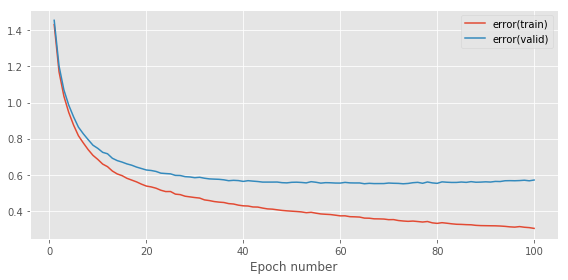

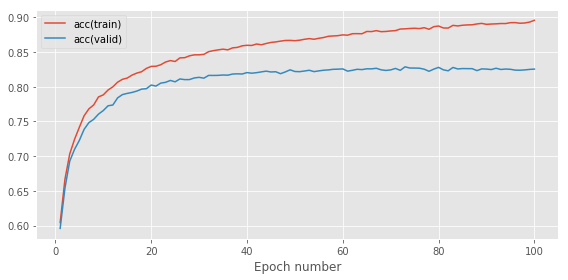

In [6]:
############## Adam With scheduler with warm restarts

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule,GradientDescentLearningRule,RMSPropLearningRule
from mlp.optimisers import Optimiser
from mlp.schedulers import CosineAnnealingWithWarmRestarts

#setup hyperparameters
learning_rate = 1e-4
learning_range = 1.05
# learning_ranges = [1.05]
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

adam_scheduler_warm = CosineAnnealingWithWarmRestarts(min_learning_rate=learning_rate / learning_range, max_learning_rate=learning_rate * learning_range,
                                                       total_iters_per_period=25,
                                                       max_learning_rate_discount_factor=0.9,
                                                       period_iteration_expansion_factor=3.0)

error = CrossEntropySoftmaxError() 

# Use a basic gradient descent learning rule
learning_rule = AdamLearningRule(learning_rate=learning_rate)

#Remember to use notebook=False when you write a script to be run in a terminal
_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, test_data, num_epochs, stats_interval, notebook=True,scheduler=adam_scheduler_warm,fileName='cw4_3_adam_special_restart_{}'.format(learning_rate))